<a href="https://colab.research.google.com/github/dspark0419/DATA-205/blob/main/Project_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.10


In [2]:
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
# !pip install --upgrade datetime

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

In [4]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 333kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [5]:
import plotly.express as px
import plotly.graph_objects as go

# **MC Census Data: mcZcta**

In [6]:
mcZcta = pd.read_csv('mcZcta.csv')

In [7]:
std_zip = mcZcta['ZCTA5N'].unique()

In [8]:
mcZcta.head()

,Unnamed: 0,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,62,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
1,102,103,20777,24,2420777,B5,G6350,S,20777,24,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,45.6,27,2.4,76.3,20.1,4.5,7.7,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,33086.301965,3.274726e+07
2,111,112,20812,24,2420812,B5,G6350,S,20812,24,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,42.4,4,4.0,72.9,19.5,9.4,4.3,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,5468.269608,1.437529e+06
3,112,113,20814,24,2420814,B5,G6350,S,20814,24,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,40.3,838,5.9,40.5,27.7,43.9,14.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,32694.708048,2.192136e+07
4,113,114,20815,24,2420815,B5,G6350,S,20815,24,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,45.4,759,5.5,45.4,28.9,36.2,13.5,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,30177.706413,2.337013e+07


Drop unnamed columns

In [9]:
mcZcta = mcZcta.loc[:, ~mcZcta.columns.str.contains('^Unnamed')]

In [10]:
mcZcta.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
1,103,20777,24,2420777,B5,G6350,S,20777,24,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,45.6,27,2.4,76.3,20.1,4.5,7.7,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,33086.301965,3.274726e+07
2,112,20812,24,2420812,B5,G6350,S,20812,24,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,42.4,4,4.0,72.9,19.5,9.4,4.3,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,5468.269608,1.437529e+06
3,113,20814,24,2420814,B5,G6350,S,20814,24,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,40.3,838,5.9,40.5,27.7,43.9,14.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,32694.708048,2.192136e+07
4,114,20815,24,2420815,B5,G6350,S,20815,24,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,45.4,759,5.5,45.4,28.9,36.2,13.5,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,30177.706413,2.337013e+07


In [11]:
mcZcta['ZCTA5N'].unique()

array([20707, 20777, 20812, 20814, 20815, 20816, 20817, 20818, 20832,
       20833, 20837, 20838, 20839, 20841, 20842, 20850, 20851, 20852,
       20853, 20854, 20855, 20860, 20861, 20862, 20866, 20868, 20871,
       20872, 20874, 20876, 20877, 20878, 20879, 20882, 20886, 20895,
       20901, 20902, 20903, 20904, 20905, 20906, 20910, 20912, 21771,
       21797])

# **Dataset: Crime**

## **Data Wrangling**

In [12]:
import json
import requests

In [13]:
#crime_json = requests.get('https://data.montgomerycountymd.gov/resource/icn6-v9z3.json')
#crime_0 = pd.DataFrame(crime_json.json())

data source: https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3/data

In [14]:
crime_0 = pd.read_csv('Crime.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
crime_0.shape

(241972, 30)

In [16]:
crime_0.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [17]:
crime_0.duplicated().sum()

0

In [18]:
crime_col = ['Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Zip Code', 'Start_Date_Time']
crime_sel = crime_0[crime_col]

In [19]:
crime_sel['year'] = pd.to_datetime(crime_sel['Start_Date_Time']).dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
crime_sel['year'].unique()

array([2020, 2018, 2019, 2017, 2016, 2021])

In [21]:
crime_sel.isnull().sum()

Victims               0
Crime Name1         177
Crime Name2         177
Crime Name3         177
Zip Code           3192
Start_Date_Time       0
year                  0
dtype: int64

In [22]:
crime_sel = crime_sel.dropna()

In [23]:
crime_sel.shape

(238603, 7)

In [24]:
crime_sel['Zip Code'].nunique()

179

In [25]:
mcCrime = crime_sel[crime_sel['Zip Code'].isin(std_zip)]

In [26]:
mcCrime['Zip Code'].unique() # zip code 21770 missing, but negligible

array([20816., 20872., 20876., 20860., 20878., 20854., 20874., 20895.,
       20850., 20902., 20877., 20886., 20879., 20906., 20851., 20904.,
       20852., 20910., 20912., 20901., 20814., 20871., 20905., 20815.,
       20903., 20817., 20866., 20855., 20853., 20832., 20837., 20882.,
       20833., 20818., 20841., 20861., 20842., 20868., 20707., 21771.,
       20812., 20862., 20838., 20777., 20839., 21797.])

In [27]:
mcCrime['Zip Code'] = mcCrime['Zip Code'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
mcCrime.head()

,Victims,Crime Name1,Crime Name2,Crime Name3,Zip Code,Start_Date_Time,year
0,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,20816,03/18/2020 09:00:00 PM,2020
1,1,Other,All Other Offenses,POLICE INFORMATION,20872,03/19/2020 01:00:00 PM,2020
2,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,20876,08/19/2020 06:30:00 PM,2020
3,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),20860,11/02/2018 03:34:00 PM,2018
4,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,20878,11/02/2018 12:00:00 AM,2018


## **Data Visualizations**

In [29]:
mcPopCrime = pd.merge(mcCrime, mcZcta, left_on='Zip Code', right_on='ZCTA5N', how='right') #.drop(columns=['Zip Code'])

In [30]:
mcPopCrime.head()

,Victims,Crime Name1,Crime Name2,Crime Name3,Zip Code,Start_Date_Time,year,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,1,Other,All Other Offenses,OVERDOSE,20707,07/15/2020 09:17:00 PM,2020,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
1,1,Crime Against Property,Identity Theft,IDENTITY THEFT,20707,10/10/2019 06:00:00 PM,2019,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
2,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,20707,07/11/2016 09:00:00 PM,2016,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
3,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,20707,01/11/2020 10:00:00 PM,2020,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07
4,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SMUGGLE,20707,07/28/2016 07:30:00 AM,2016,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,44625.382501,4.827461e+07


In [31]:
plt.rcParams['figure.figsize'] = (15, 6) # global fugure size

In [32]:
by_col = ['Crime Name1', 'Crime Name2', 'Crime Name3', 'ZCTA5N', 'year']
summaries = {'Victims': 'sum', 'POP100': 'mean'}
mcPopCrime_byCol = mcPopCrime.groupby(by=by_col).agg(summaries).reset_index()

In [33]:
mcPopCrime_byCol['ZCTA5N'].unique()

array([20814, 20817, 20832, 20837, 20838, 20850, 20851, 20853, 20854,
       20866, 20868, 20871, 20872, 20874, 20876, 20877, 20878, 20879,
       20882, 20886, 20901, 20902, 20903, 20904, 20905, 20906, 20910,
       20912, 20707, 20815, 20833, 20841, 20842, 20852, 20855, 20895,
       21771, 20816, 20860, 20818, 20862, 20861, 20812, 20839, 20777,
       21797])

In [34]:
mcPopCrime_byCol = mcPopCrime_byCol.sort_values('ZCTA5N')

In [35]:
mcPopCrime_byCol['ZCTA5N'].unique()

array([20707, 20777, 20812, 20814, 20815, 20816, 20817, 20818, 20832,
       20833, 20837, 20838, 20839, 20841, 20842, 20850, 20851, 20852,
       20853, 20854, 20855, 20860, 20861, 20862, 20866, 20868, 20871,
       20872, 20874, 20876, 20877, 20878, 20879, 20882, 20886, 20895,
       20901, 20902, 20903, 20904, 20905, 20906, 20910, 20912, 21771,
       21797])

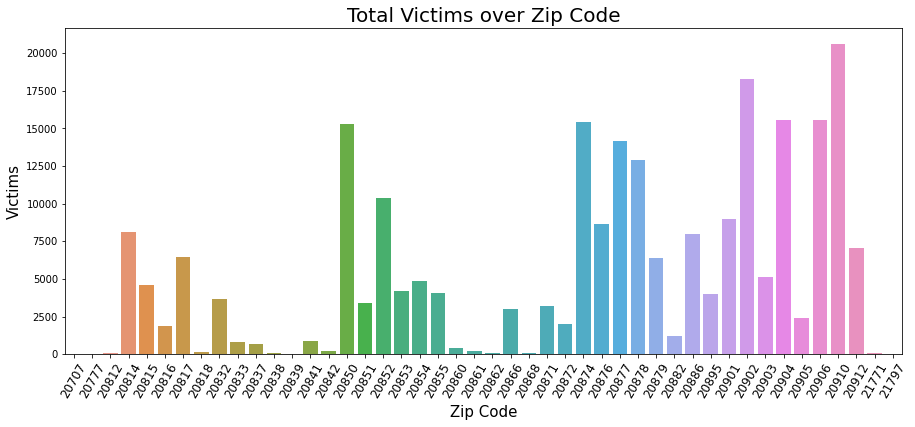

In [36]:
sns.barplot(data=mcPopCrime_byCol, x='ZCTA5N', y='Victims', ci=None, estimator=sum)

plt.title('Total Victims over Zip Code', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

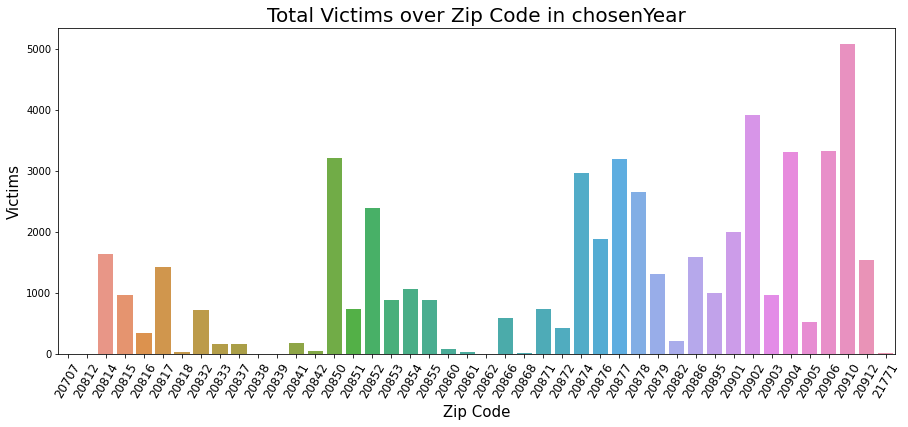

In [47]:
chosenYear = 2019
mcPopCrime_byCol_year = mcPopCrime_byCol[mcPopCrime_byCol['year'] == chosenYear]

sns.barplot(data=mcPopCrime_byCol_year, x='ZCTA5N', y='Victims', estimator=sum, ci=None)

plt.title('Total Victims over Zip Code in chosenYear', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

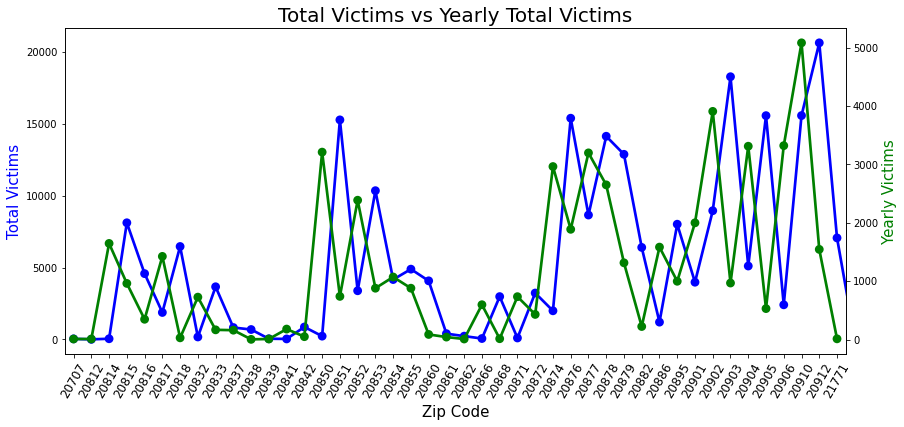

In [48]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopCrime_byCol, x='ZCTA5N', y='Victims', color='blue', ci=None, estimator=sum)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopCrime_byCol_year, x='ZCTA5N', y='Victims', color='green', ci=None, estimator=sum)

ax.set_title('Total Victims vs Yearly Total Victims', size=20)
#ax.set_xticks()
ax.set_xticklabels(mcPopCrime_byCol_year['ZCTA5N'].unique(), rotation=60, size=12) #ax.get_xticklabels()
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Total Victims', size=15, color='blue')
ax1.set_ylabel('Yearly Victims', size=15, color='green')

plt.show()

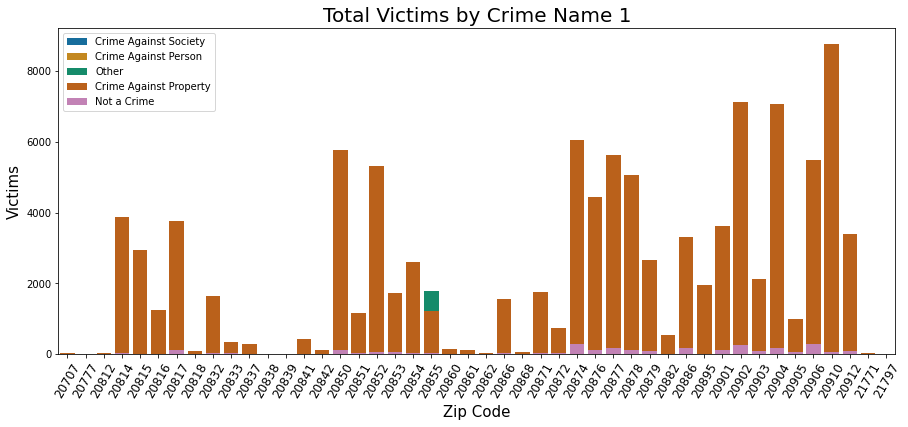

In [39]:
sns.barplot(data=mcPopCrime_byCol, x='ZCTA5N', y='Victims', hue='Crime Name1', palette='colorblind',
            dodge=False, orient='v', ci=None, estimator=sum)

plt.title('Total Victims by Crime Name 1', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)
plt.legend(loc='upper left')
plt.show()

In [51]:
x_array = np.sort(mcPopCrime_byCol['ZCTA5N'].unique())

fig =px.bar(mcPopCrime_byCol, x='ZCTA5N', y='Victims', color='Crime Name1', barmode='stack',
            color_continuous_scale=px.colors.sequential.Greens) # labels={'ZCTA5N': 'Zip Code'} same as xaxis title below

fig.update_xaxes(type='category', title='Zip Code', categoryorder='array', categoryarray=x_array, 
                 tickangle=-60, tickfont_size=11) # categoryorder='total descending' to display bars in descending order

fig.update_layout(font_color='black', paper_bgcolor='lightgrey', plot_bgcolor='white')

fig.update_layout(title_text='Total Victims by Crime Name 1', title_x=0.5, title_y=0.95,
                  title_font_color='green', title_font_size=22)

fig.update_layout(legend_x=0.01, legend_y=0.99, legend_bgcolor='lightgrey') # showlegend=False, legend_font_size=10
fig.show()

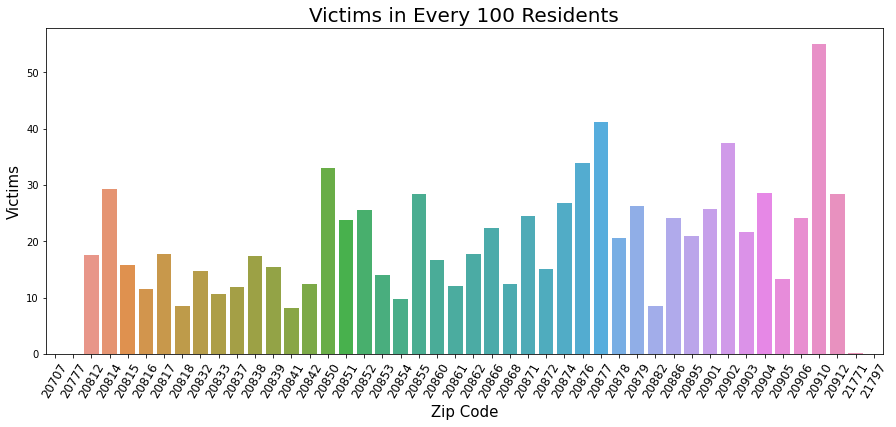

In [41]:
sns.barplot(data=mcPopCrime_byCol, x='ZCTA5N', y=mcPopCrime_byCol['Victims']/mcPopCrime_byCol['POP100']*100, 
            ci=None, estimator=sum)

plt.title('Victims in Every 100 Residents', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

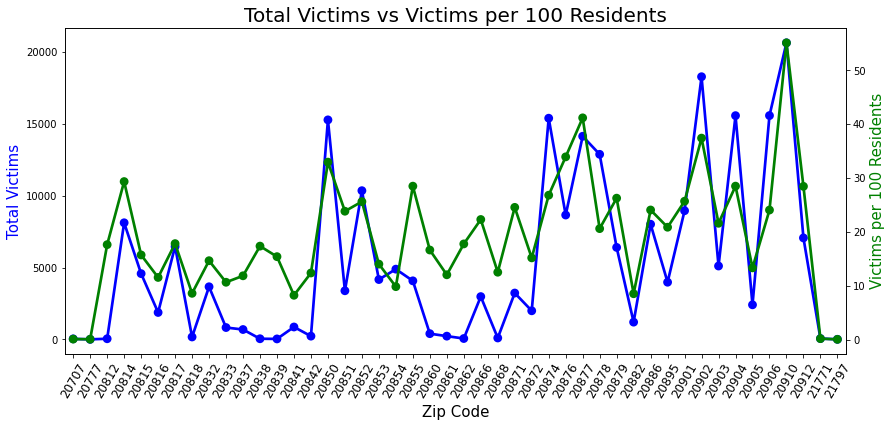

In [42]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopCrime_byCol, x='ZCTA5N', y='Victims', color='blue', ci=None, estimator=sum)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopCrime_byCol, x='ZCTA5N', 
              y=mcPopCrime_byCol['Victims']/mcPopCrime_byCol['POP100']*100, color='green',
              ci=None, estimator=sum)

ax.set_title('Total Victims vs Victims per 100 Residents', size=20)
#ax.set_xticks()
ax.set_xticklabels(mcPopCrime_byCol['ZCTA5N'].unique(), rotation=60, size=12) #ax.get_xticklabels()
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Total Victims', size=15, color='blue')
ax1.set_ylabel('Victims per 100 Residents', size=15, color='green')

plt.show()

In [43]:
summaries = {'Victims': 'sum', 'POP100': 'mean'}
mcPopCrime_byZip = mcPopCrime.groupby('ZCTA5N').agg(summaries).reset_index()

In [44]:
x_array = np.sort(mcPopCrime_byZip['ZCTA5N'].unique())

fig =px.line(x=mcPopCrime_byZip['ZCTA5N'], y=mcPopCrime_byZip['Victims']/mcPopCrime_byZip['POP100']*10000, 
             color=px.Constant('Victims per 10000'))

fig.add_bar(x=mcPopCrime_byZip['ZCTA5N'], y=mcPopCrime_byZip['Victims'], name='Total Victims')

fig.update_xaxes(type='category', title='Zip Code', categoryorder='array', categoryarray=x_array, 
                 tickangle=-60, tickfont_size=11)

fig.update_yaxes(title='Victims', tickfont_size=11)

fig.update_layout(font_color='black', paper_bgcolor='lightgrey', plot_bgcolor='white')

fig.update_layout(title_text='Total Victims vs Victims per 10000 Residents', title_x=0.5, title_y=0.95,
                  title_font_color='green', title_font_size=22)

fig.update_layout(legend_x=0.01, legend_y=0.99, legend_bgcolor='lightgrey')
fig.show()